In [6]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd

In [8]:
df= pd.read_csv("Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


Given is the dataframe with salary details of employee based on their rank, discipline, qualifications,experience and sex.

In [9]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [10]:
df.shape

(397, 6)

There are 397 rows and 6 columns in this dataset

In [11]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

Columns are as such:
    
rank: It gives the rank of the employees they are posted on.
    
discipline: It gives the detail about the feild the expertise of each employees.
    
yrs.since.phd: It gives the toatl year of finishing their phd.
    
yrs.service: It gives the total experience the employees are having.
    
sex: Sex of the employees
    
salary: salary details of employee based on their rank, discipline, qualifications,experience and sex.

In [12]:
#Checking data type of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


There is no null values in any columns.

rank, discipline and sex column has data of object dtypes and yrs.since.phd, yrs.service and salary column has data of integer type.

## EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There are not any null values in the given dataframe.

<AxesSubplot:>

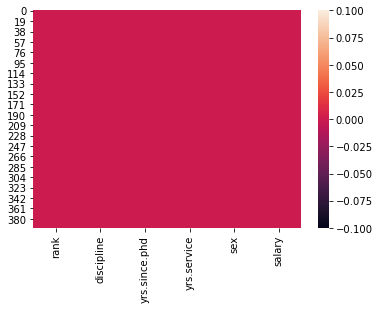

In [15]:
#To check missing values
sns.heatmap(df.isnull())

OBSERVATIONS: 
Data has no missing values.
If there were any, it would have been visible in different colour shade.

In [16]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


#### Visualizing norminal data  variables

To explore different category in each categorical variables, we will make countplot.

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

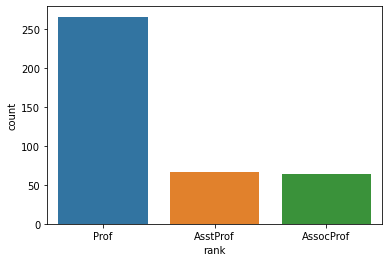

In [17]:
sns.countplot(df['rank'])
df['rank'].value_counts()

Number of Prof is highest i.e. 266 in numbers. AsstProf and AssocProf are almost same in numbers.

B    216
A    181
Name: discipline, dtype: int64

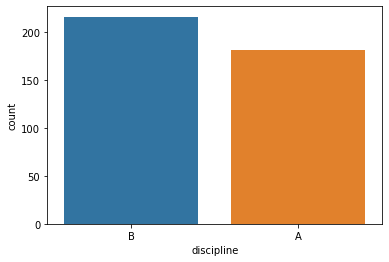

In [18]:
sns.countplot(df['discipline'])
df['discipline'].value_counts()

Number of A discipline employees are less than B discipline employees.

Male      358
Female     39
Name: sex, dtype: int64

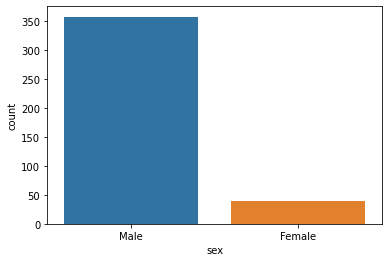

In [19]:
sns.countplot(df['sex'])

df['sex'].value_counts()

Number of males are much greater than number of females.

Let's make a boxplot for these variables to check its relationship with target variables and to check the outliers in these categorical variables.

<AxesSubplot:xlabel='sex', ylabel='salary'>

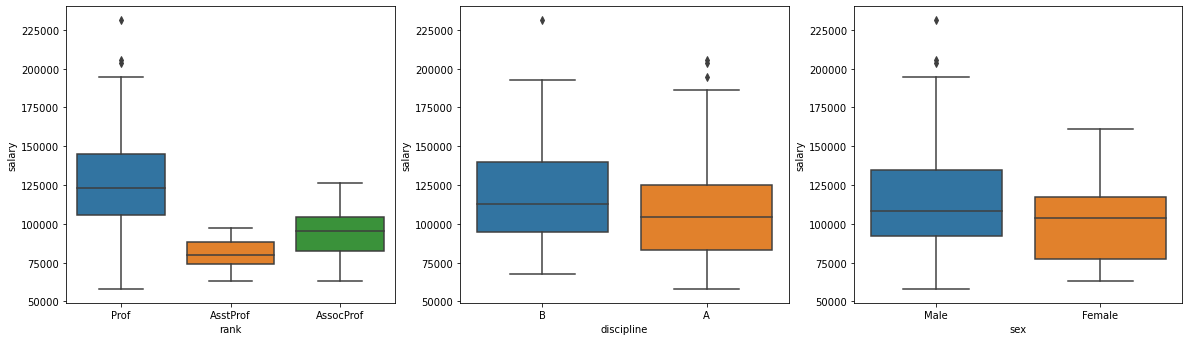

In [20]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'rank', y = 'salary', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'discipline', y = 'salary', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'sex', y = 'salary', data = df)

#### Checking the distribution of continuous variables-

#### Vizualising numerical variables
Let's make a pairplot of all the numeric variables

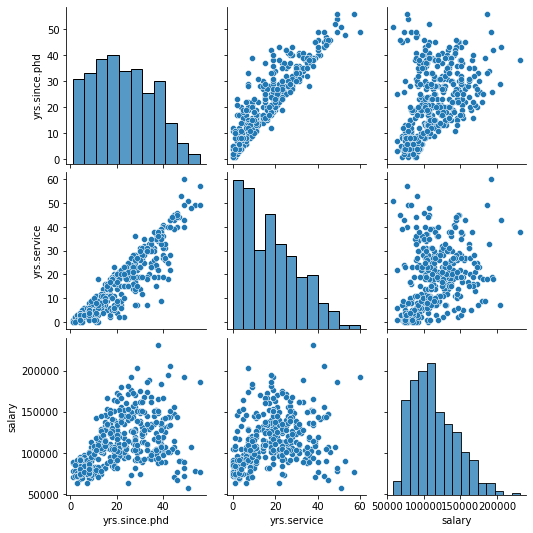

In [21]:
sns.pairplot(df)
plt.show()

#### Changing Categorical variables to integer type

In [22]:
# Since 'rank','discipline' and 'sex' Are of object dtype. So we are applying ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
encode=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=encode.fit_transform(df[i].values.reshape(-1,1))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


#### Describing the dataset

In [23]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


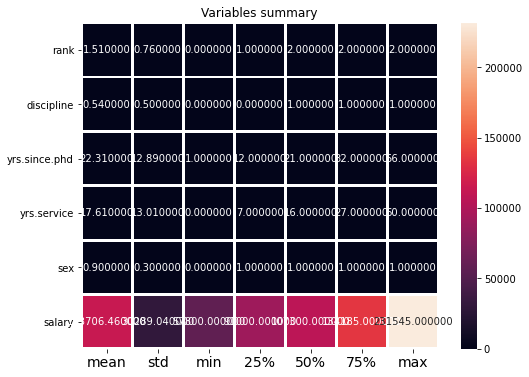

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.title('Variables summary')
plt.show()

#### To check correlation

In [25]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

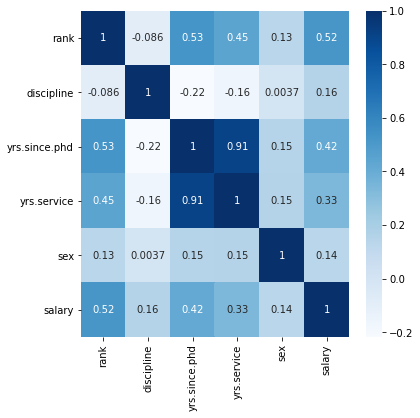

In [26]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

All the variables are positively correlated with the target variables.
Rank is highly correlated with salary which means higher tha rank, higher is the salary.

yrs.since.phd is also having good bond with salary which is 42%, means salary also depends upon the years of completion of phd.

yrs.experience is also 33% correlated with target variables. More the experience, more is the salary.

Since the salary is least correlated with sex,it doesnot depend much on sex of the employee.

maximum correlated: rank
    
minimum correlated: sex

From the box plot we can see prof rank has few outliers, A & B discipline both have few outliers and male sex has few outliers.

#### Checking skewness

In [27]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Since no columns has skewness, we will not treat that

#### To check the distribution of skewness(Normal Distribution Curve)

<AxesSubplot:xlabel='rank', ylabel='Density'>

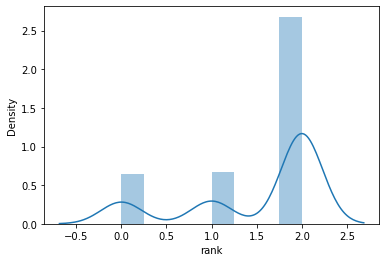

In [28]:
sns.distplot(df['rank'])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

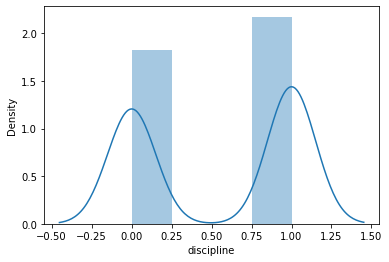

In [29]:
sns.distplot(df['discipline'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

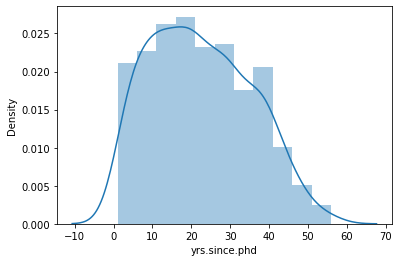

In [30]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

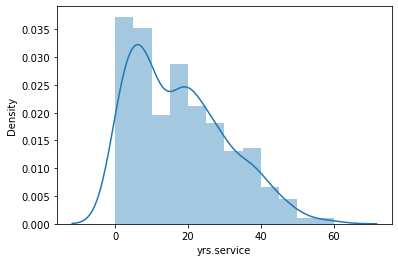

In [31]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='sex', ylabel='Density'>

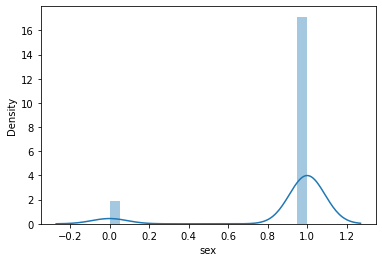

In [32]:
sns.distplot(df['sex'])

We can see the data is skewed

#### Outliers check

rank                AxesSubplot(0.125,0.536818;0.110714x0.343182)
discipline       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
yrs.since.phd    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
yrs.service      AxesSubplot(0.523571,0.536818;0.110714x0.343182)
sex              AxesSubplot(0.656429,0.536818;0.110714x0.343182)
salary           AxesSubplot(0.789286,0.536818;0.110714x0.343182)
dtype: object

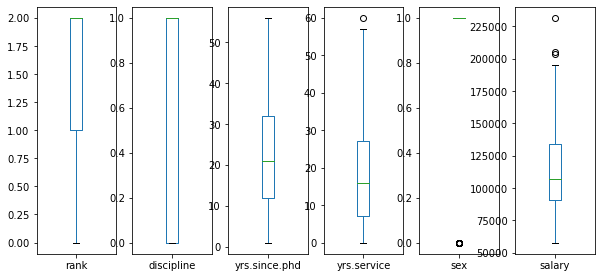

In [33]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

There are no outliers in rank,discipline, and yrs.since.phd. 

one outlier is there in sex because of only two distict type of data in sex. so we cannot ignore any particular sex while considering a dataset.

Few outliers are there in yrs,service

salary is showing few outliers.

#### Removing the outliers

In [34]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [35]:
z.shape

(397, 6)

In [36]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [37]:
#z-score values through Rows and columns
z[9][4]

3.0297668523315746

In [38]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [39]:
print(df.shape)
print(df_new.shape)

(397, 6)
(354, 6)


#### Percent data loss

In [40]:
loss_percent=(397-354)/397*100
print(loss_percent)

10.831234256926953


Our model is becoming biased as it is removing one category of sex columns completely as outliers. Also 10% of data is being lost.
So we will not remove the outliers.

#### Separating columns into features and target

In [41]:
x=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [42]:
x.shape

(397, 5)

In [43]:
y.shape

(397,)

#### Tansforming data to remove Skewness

In [44]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.69005113,  0.91540317, -0.12729454,  0.25061906,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.10511199,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069, -1.28803213,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.69878852,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198,  0.02856739,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737, -1.12348349,  0.3300584 ]])

### Since the target has multiple outcomes, we will use linear regression model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=47)

In [48]:
x_train.shape

(364, 5)

In [49]:
y_train.shape

(364,)

In [50]:
x_test.shape

(33, 5)

In [51]:
y_test.shape

(33,)

In [52]:
lm=LinearRegression()
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LinearRegression()
0.42171097796406043


In [53]:
print(lm.coef_)

[14344.86205182  7697.16143862  9575.47037153 -3043.58329056
  1263.81103041]


In [54]:
print(lm.intercept_)

114255.92440476341


In [55]:
#Predict the Salary
pred=lm.predict(x_test)
print('Predicted salary',pred)
print('Actual salary',y_test)

Predicted salary [ 75986.35816391 124063.2012539  138995.86977089  90884.0440139
 130224.3073316   78990.57604942  80499.16153444  73621.68272808
  86454.9433513  120761.17077472 134542.47556942 126701.34787839
 120883.48951645 125622.84948609 121770.49921624 123966.19887535
  88667.17901761  88989.52656338 115662.85348971  83158.10916862
 127066.16632441  94972.60826816 116973.58070511 115372.42920451
 119716.66016739 117515.85920271 132781.79211744  90322.55619922
  88989.52656338 133219.27941597  94874.38450812 128561.46973605
 123680.83252519]
Actual salary 119     73500
68     111512
211    111350
260     88600
131     76840
108     81500
363     81285
382     86895
5       97000
128    113278
175    111751
304    144050
312     94350
365    101036
387    109305
300     88600
39     100938
57      90215
139    152664
396     81035
32     117256
33      80225
124     96614
110    112429
314    146800
239     96200
69      91412
176     95436
60      90304
326    124714
96      9561

In [56]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 15217.925076964824
Mean squared error: 400780079.15421003
Root Mean squared error: 20019.4924799359


In [57]:
from sklearn.metrics import r2_score  # r2 says that what is the variance coming in y whenver inputs are changed
print(r2_score(y_test,pred))

0.01743538221828944


### Regularization

In [58]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=.0001)
#ls=Lasso(alpha=1.0) ..... Default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.4217109779640602

In [59]:
ls.coef_

array([14344.86201748,  7697.16127531,  9575.46925076, -3043.58216283,
        1263.81092805])

In [60]:
rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.4217109779639713

#### Support Vector Machine model

In [61]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

-0.033075641925010224
-0.04750363431255922
-0.04911363039335326


In [62]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}

model=Ridge()
grid= GridSearchCV(estimator=model, param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.35458683673493335
1
{'alpha': 1}


### Conclusion

From the above linear regression of model,regularization model,Support Vector machine model,and Grid Search model,we can see that  lm.score, ls.score.rd.score and sv.score(linear)are coming almost same which is 0.99.
So i am continuing with linear regression model without outliers.

In [64]:
import numpy as np
a=np.array(y_test)
Predicted=np.array(pred)
df_com=pd.DataFrame({'Original':a,'Predicted':Predicted},index=range(len(a)))
df_com

,Original,Predicted
0,73500,75986.358164
1,111512,124063.201254
2,111350,138995.869771
3,88600,90884.044014
4,76840,130224.307332
5,81500,78990.576049
6,81285,80499.161534
7,86895,73621.682728
8,97000,86454.943351
9,113278,120761.170775


### Model Saving

In [66]:
import pickle
filename='Predicted_Salary.pkl'
pickle.dump(lm,open(filename,'wb'))